# Introduction to Python for Digital Text Analysis (Part I)

This session will provide an overview of how Python can be used to descriptively summarise a dataset.

We expect you to have basic knowledge of Python, bue if you don't, here's the link:
https://github.com/fbkarsdorp/python-intro/blob/master/notebook.ipynb

## Refreshing your python memory

In [514]:
# Strings

s = "Hello world!"

s2 = s.replace("world", "python")
print(s2)

s3 = s2.replace("Hello","monty")
print(s3)

s4 = s + ' '+ s3
print(s4)

splitstring = s4.split()
print (splitstring)

Hello python!
monty python!
Hello world! monty python!
['Hello', 'world!', 'monty', 'python!']


In [515]:
# Lists

my_list = []

my_list.append(10)
my_list.append(20)

my_list = my_list + [ 30 ]

my_list += range(4)

print( my_list )
print( my_list[:2] )
print( my_list[4:] )
print( my_list[:2]+my_list[4:] )

[10, 20, 30, 0, 1, 2, 3]
[10, 20]
[1, 2, 3]
[10, 20, 1, 2, 3]


In [516]:
# Dictionaries

my_dict = {}

my_dict['location'] = 'Brussels'
my_dict['host'] = 'EASt'
my_dict['event'] = 'workshop'

my_dict

{'event': 'workshop', 'host': 'EASt', 'location': 'Brussels'}

In [517]:
# for loops
for i in range(5):
    print(i)

0
1
2
3
4


In [518]:
names  = [ 'Amelie','Tom','Niko','Ruben','Esma' ]

for name in names:
    print ("My name is "+name)

My name is Amelie
My name is Tom
My name is Niko
My name is Ruben
My name is Esma


In [519]:
# zip

names  = [ 'Amelie','Tom','Niko','Ruben','Esma' ]
births = [ 1968, 1984, 1977, 1988, 1973 ]
 
for i, j in zip(names, births):
    print(i, "was born in", j)

Amelie was born in 1968
Tom was born in 1984
Niko was born in 1977
Ruben was born in 1988
Esma was born in 1973


# Data analysis with *pandas*

In [522]:
import pandas as pd

**comments** will be a **DataFrame** object. You can think of this object as a spreadsheet.

In [523]:
# Sample of comments about the BTS video 'Save Me'.
comments = pd.read_excel("data/videos.xlsx", sheetname=1)

In [524]:
# Show first rows of dataframe
comments.head()

,Search,Title,VideoID,CommentID,CommentPublished,CommentUpdated,CommentTextDisplay,CommentAuthorName,CommentAuthorURI,CommentCanReply,CommentTotalReplyCount,CommentisPublic,CommentLikeCount,CommentVewerRating,IsReply,CommentPosterInfo
0,https://www.youtube.com/channel/UC3IZKseVpdzPS...,BTS (방탄소년단) 'Save ME' Official MV,GZjt_sA2eso,z234uhc5gljycromkacdp432q0vjces4wq3zuewbnfhw03...,2017-08-01T18:26:30.000Z,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,http://www.youtube.com/channel/UCVg43Gk6iCw0iq...,false,0.0,1.0,1,none,0,NaN
1,https://www.youtube.com/channel/UC3IZKseVpdzPS...,BTS (방탄소년단) 'Save ME' Official MV,GZjt_sA2eso,z121jpbosx3ds5quw23fg5jxoqfnhbdjq04,2017-08-01T18:24:35.000Z,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,http://www.youtube.com/channel/UCOavwxVoZXnW0L...,false,0.0,1.0,0,none,0,NaN
2,https://www.youtube.com/channel/UC3IZKseVpdzPS...,BTS (방탄소년단) 'Save ME' Official MV,GZjt_sA2eso,z12zyhtrbpmqjbamb234wzboknfpzfttw,2017-08-01T18:17:07.000Z,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,http://www.youtube.com/channel/UCYMpAZqqP1fX8p...,false,0.0,1.0,0,none,0,NaN
3,https://www.youtube.com/channel/UC3IZKseVpdzPS...,BTS (방탄소년단) 'Save ME' Official MV,GZjt_sA2eso,z12aefop2vajiz0xz04cen3gruqffxlwpzk0k,2017-08-01T17:59:55.000Z,2017-08-01T17:59:55.000Z,love,sakar qadr,http://www.youtube.com/channel/UCYXxHDHz7g1owk...,false,0.0,1.0,0,none,0,NaN
4,https://www.youtube.com/channel/UC3IZKseVpdzPS...,BTS (방탄소년단) 'Save ME' Official MV,GZjt_sA2eso,z13lilvxpo3reffpo04cgtizfpqaj5co1wc0k,2017-08-01T17:50:49.000Z,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,http://www.youtube.com/channel/UCwDSreKzLMK8NK...,false,0.0,1.0,1,none,0,NaN


In [525]:
# Selecting

comments = comments.filter( items=['CommentPublished','CommentTextDisplay','CommentAuthorName','CommentLikeCount'] )

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,1
1,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,0
2,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,0
3,2017-08-01T17:59:55.000Z,love,sakar qadr,0
4,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,1


In [526]:
# Filtering

zero_likes = comments[ comments['CommentLikeCount'] == 0 ]

zero_likes.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
1,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,0
2,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,0
3,2017-08-01T17:59:55.000Z,love,sakar qadr,0
7,2017-08-01T16:26:05.000Z,Who still watch in 2017?,ekisho raito,0
8,2017-08-01T16:24:59.000Z,Who watch this in 2017?,TheyCallMe Kitty,0


In [527]:
one_two_likes = comments[ (comments['CommentLikeCount'] >= 1) & (comments['CommentLikeCount'] <= 2) ]

one_two_likes.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,1
4,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,1
5,2017-08-01T17:42:27.000Z,like si eres army y nunca los vas a dejar de a...,army forever,1
6,2017-08-01T17:35:46.000Z,som hermosos,jenni SN,1
16,2017-08-01T15:31:16.000Z,Limdo😘,julinharavelly Jesus,1


In [528]:
# Adding new column

comments['FewLikes'] = (comments['CommentLikeCount'] >= 1) & (comments['CommentLikeCount'] <= 2)

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,FewLikes
0,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,1,True
1,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,0,False
2,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,0,False
3,2017-08-01T17:59:55.000Z,love,sakar qadr,0,False
4,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,1,True


In [529]:
del comments['FewLikes']

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,1
1,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,0
2,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,0
3,2017-08-01T17:59:55.000Z,love,sakar qadr,0
4,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,1


In [530]:
# Synonyms

print( comments.head()['CommentTextDisplay'] )

print ("\n---------------------------------------------------------\n")

print( comments.head().CommentTextDisplay )

print ("\n---------------------------------------------------------\n")

print( comments.head().CommentTextDisplay.values )

0    V looks so awesome ! hope they come some day t...
1                        esteroreroshepo atianitiro  +
2                                      Yeah  jimin♥♥♥♥
3                                                 love
4                Please come to Greece Thessaloniki!!!
Name: CommentTextDisplay, dtype: object

---------------------------------------------------------

0    V looks so awesome ! hope they come some day t...
1                        esteroreroshepo atianitiro  +
2                                      Yeah  jimin♥♥♥♥
3                                                 love
4                Please come to Greece Thessaloniki!!!
Name: CommentTextDisplay, dtype: object

---------------------------------------------------------

['V looks so awesome ! hope they come some day to germany xD'
 'esteroreroshepo atianitiro  +' 'Yeah  jimin♥♥♥♥' 'love'
 'Please come to Greece Thessaloniki!!!']


In [531]:
# Print one specific line

print (comments.loc[4])

print ("\n---------------------------------------------------------\n")

print (comments.loc[4].CommentTextDisplay)

CommentPublished                   2017-08-01T17:50:49.000Z
CommentTextDisplay    Please come to Greece Thessaloniki!!!
CommentAuthorName                            brina paulidou
CommentLikeCount                                          1
Name: 4, dtype: object

---------------------------------------------------------

Please come to Greece Thessaloniki!!!


# Basic statistics and data visualisation

In [532]:
comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,1
1,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,0
2,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,0
3,2017-08-01T17:59:55.000Z,love,sakar qadr,0
4,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,1


In [533]:
# Fixing dates and times 

from datetime import datetime
from dateutil import parser

dt = parser.parse('2017-08-01T18:26:30.000Z')

dt

datetime.datetime(2017, 8, 1, 18, 26, 30, tzinfo=tzutc())

In [534]:
# apply and lambda

comments['CommentDateTime'] = comments.apply( lambda row: parser.parse(row.CommentPublished), axis=1 )  

print( "min CommentDateTime =", comments.CommentDateTime.min() )
print( "max CommentDateTime =", comments.CommentDateTime.max() )

min CommentDateTime = 2017-08-01 02:25:18+00:00
max CommentDateTime = 2017-08-01 18:26:30+00:00


In [535]:
comments['hour'] = comments.apply( lambda row: row.CommentDateTime.hour, axis=1 )  

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentDateTime,hour
0,2017-08-01T18:26:30.000Z,V looks so awesome ! hope they come some day t...,xSeriouslyable,1,2017-08-01 18:26:30+00:00,18
1,2017-08-01T18:24:35.000Z,esteroreroshepo atianitiro +,strike virtual,0,2017-08-01 18:24:35+00:00,18
2,2017-08-01T18:17:07.000Z,Yeah jimin♥♥♥♥,yuot yuot,0,2017-08-01 18:17:07+00:00,18
3,2017-08-01T17:59:55.000Z,love,sakar qadr,0,2017-08-01 17:59:55+00:00,17
4,2017-08-01T17:50:49.000Z,Please come to Greece Thessaloniki!!!,brina paulidou,1,2017-08-01 17:50:49+00:00,17


### Comments over time

In [536]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

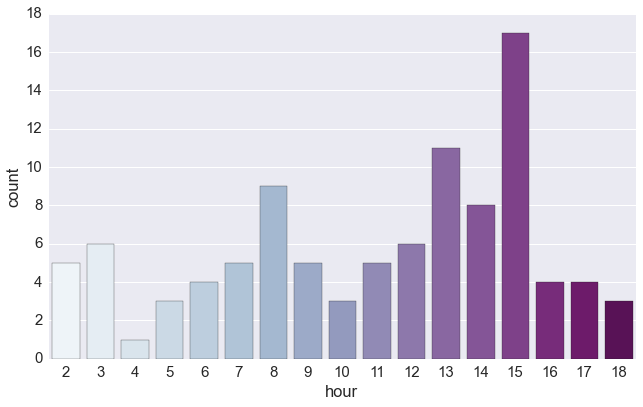

In [537]:
g = sns.factorplot(x="hour", data=comments, kind="count",
                   palette="BuPu", size=6, aspect=1.5)

### Likes per comment

In [538]:
print ("The mean number of likes per comment is", comments.CommentLikeCount.mean())

The mean number of likes per comment is 0.959595959596


In [539]:
from collections import Counter

Counter( comments.CommentLikeCount )

Counter({0: 40, 1: 43, 2: 4, 3: 8, 4: 2, 6: 2})

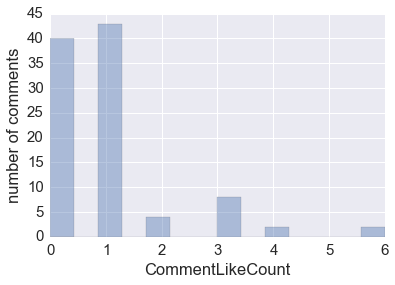

In [540]:
g = sns.distplot( comments.CommentLikeCount, kde=False, rug=False )
g = g.set_ylabel('number of comments')

We can look in more detail at the comments with the most likes.

In [541]:
for i in comments[ comments.CommentLikeCount > 3 ].CommentTextDisplay:
    print(i+'\n')

i've been watching BTS' MVs and bangtan bombs for the past 2 weeks nonstop i think i remember all their names now..hopefully (yay)! its so amazing how they have achieved so many things yet they're so so humble u don't see that these days with a lot of celebs. i almost feel like they're my family they're just so relatable and genuine its crazy af i now get why they have so many loyal fans youse aren't messing around lmao    the guy at 2:00 i think hoseok is his name?? oh boy that man caught my attention in dope (my very first bts video) and he is still catching my attention he is beautiful and got smooth moves!!

Dont wanna be lonely, just wanna be yours, same Jimin same 😍

LIKE YES THE LIKE JIMIN Y SUGA

JIMINNNNNNN AHHHHH



In [553]:
# Set
all_authors = set(comments.CommentAuthorName)
print ("Number of unique authors: ",len(all_authors))

Number of unique authors:  91


In [542]:
comments_per_author = []
likes_per_author = []

for author in all_authors:
    number_of_comments = len(comments[comments.CommentAuthorName ==  author])
    comments_per_author.append(number_of_comments)
    
    number_of_likes    = comments[comments.CommentAuthorName ==  author].CommentLikeCount.sum()
    likes_per_author.append(number_of_likes)

data_dict = { 'Author':list(all_authors), 'CommentCount':comments_per_author, 'TotalLikes':likes_per_author }
authors = pd.DataFrame(data_dict)

authors.head()

,Author,CommentCount,TotalLikes
0,strike virtual,1,0
1,Coreen Chan,1,0
2,Владислава Касько,1,1
3,M yayy,1,3
4,Abinaya Sinna,2,6


In [543]:
authors = authors.sort_values('TotalLikes', ascending=False)
authors.head(20)

,Author,CommentCount,TotalLikes
4,Abinaya Sinna,2,6
59,nicole segura,1,6
21,heyjude9895,2,5
31,Jasmin 75,1,4
18,Jeon Jk,1,3
64,SeeTheUnseen,1,3
68,Özüm Bal,1,3
30,x Kaskata,1,3
56,Gloria S.,1,3
11,xanh sen,1,3


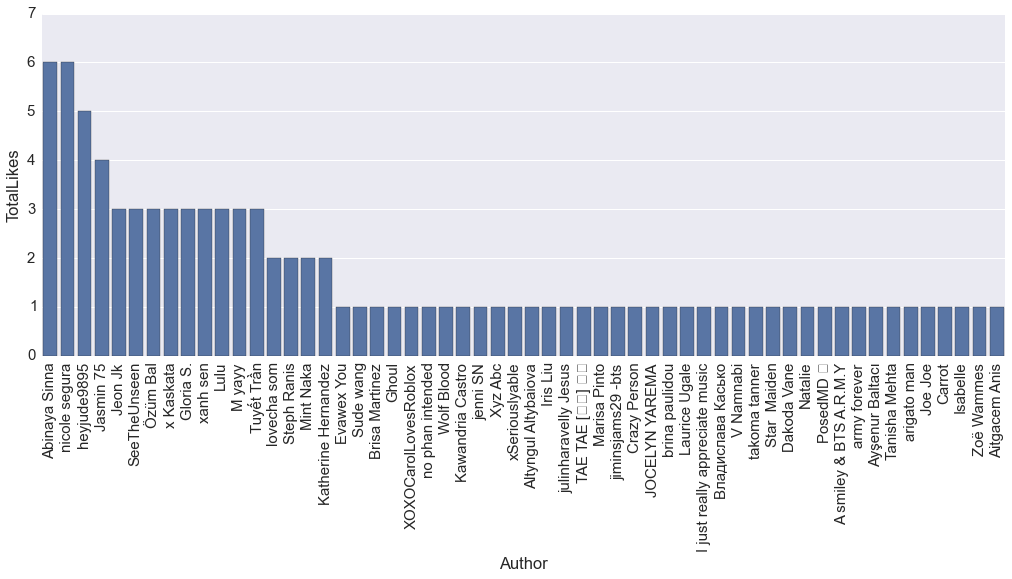

In [544]:
g = sns.factorplot(x="Author", y='TotalLikes', data=authors[authors.TotalLikes>0], 
                   kind='bar', size=6, color='b', aspect=2.5)

g = g.set_xticklabels(rotation=90)
g = g.set( ylim=(0,7) )

## To make horizontal bars:
#g = sns.factorplot(orient='h', y="Author", x='TotalLikes', data=authors[authors.TotalLikes>0], 
#                   kind='bar', size=12, color='b', aspect=0.5)
#g = g.set_xticklabels(rotation=90)
#g = g.set( xlim=(0,7) )

### Comment counts for each video for each of the four groups

In [545]:
# Blackpink comment counts.
df_blackpink_counts = pd.read_csv("data/kpop_comment_counts/blackpink_comment_counts.txt", sep="\t")

# BTS comment counts.
df_bts_counts = pd.read_csv("data/kpop_comment_counts/bts_comment_counts.txt", sep="\t")

# EXO comment counts.
df_exo_counts = pd.read_csv("data/kpop_comment_counts/exo_comment_counts.txt", sep="\t")

# Twice comment counts.
df_twice_counts = pd.read_csv("data/kpop_comment_counts/twice_comment_counts.txt", sep="\t")

In [546]:
df_blackpink_counts.head()

,VideoID,Comments
0,hKUJmA9O6iA,7317
1,Amq-qlqbjYA,50184
2,9pdj4iJD08s,41426
3,FzVR_fymZw4,23461
4,NvWfJTbrTBY,9376


In [547]:
all_bands  = [ df_blackpink_counts, df_bts_counts, df_exo_counts, df_twice_counts ]
band_names = [ 'Black Pink', 'BTS', 'EXO', 'TWICE' ]

for df,name in zip(all_bands, band_names):
    df['BandName'] = [name]*len(df)    

In [548]:
df_blackpink_counts.head()

,VideoID,Comments,BandName
0,hKUJmA9O6iA,7317,Black Pink
1,Amq-qlqbjYA,50184,Black Pink
2,9pdj4iJD08s,41426,Black Pink
3,FzVR_fymZw4,23461,Black Pink
4,NvWfJTbrTBY,9376,Black Pink


[None]

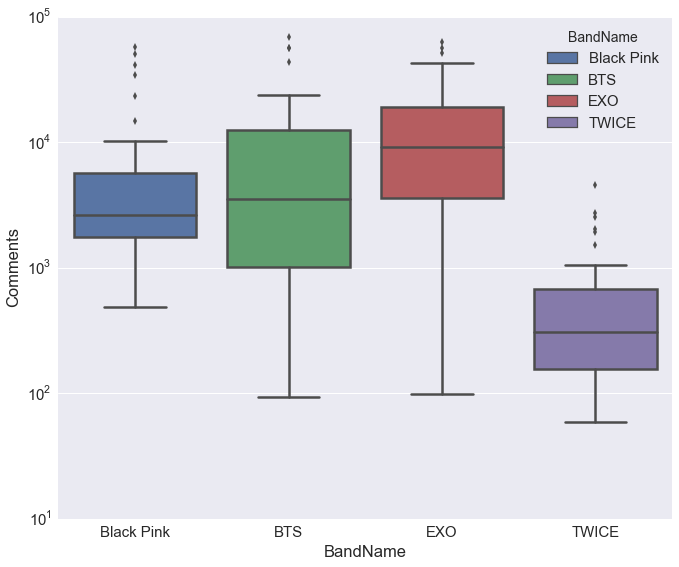

In [549]:
df_allbands = pd.concat(all_bands)

plt.subplots(figsize=(11,9))
g = sns.boxplot(x="BandName", y="Comments", hue="BandName", data=df_allbands, dodge=False)
g.set( yscale='log' )

In [ ]:
# Metadata about all videos.
df_videos = pd.read_excel("data/videos.xlsx", sheetname=0) 

# Comments about Twice videos.
df_twice = pd.read_excel("data/videos.xlsx", sheetname=2)